In [ ]:
## TO DO:
## Get 5 year average unplanned by counttry - done
## Apply 5 year average to forward availabilty
## Get forward margins
## Calculate forward utilisation Y
## calc forward runs

In [3]:
import pandas as pd
import datetime
from datetime import datetime as dt

In [4]:
from outages_flattened import RefineryData

In [5]:
oecd_eu_countries = ['Austria','Belgium','Denmark','Finland','France','Germany','Greece','Ireland','Italy','Netherlands','Norway','Portugal','Spain','Sweden','United Kingdom','Turkey','Czech Republic','Hungary','Poland','Slovakia','Switzerland']

In [13]:
oecd_nameplate = RefineryData().get_capacity('COUNTRY', oecd_eu_countries, 'CDU').groupby(axis=1, level=0).sum()


            SELECT t.EVENT_ID, t.UNIT_NAME, t.UNIT_ID, t.PLANT_ID, t.PLANT_NAME, COUNTRY, [CAP_OFFLINE]
                  ,StartDate, EndDate, [EVENT_TYPE], [START_DATE], [END_DATE], [U_CAPACITY]
              FROM [OIL].[Refinery].[RefineryMaintenanceBest] t
              inner join (
                  SELECT MaxDate = max([PDate]), EVENT_ID, tu.UNIT_ID, COUNTRY
                  FROM [OIL].[Refinery].[RefineryMaintenanceBest] t
                  inner join (
                        select PLANT_ID, PLANT_NAME, COUNTRY
                        from [OIL].[Refinery].[RefineryPlant]
                        where COUNTRY in ('Austria', 'Belgium', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Netherlands', 'Norway', 'Portugal', 'Spain', 'Sweden', 'United Kingdom', 'Turkey', 'Czech Republic', 'Hungary', 'Poland', 'Slovakia', 'Switzerland')
                  ) tp on t.PLANT_ID = tp.PLANT_ID
                  inner join (
                        select UNIT_ID
   

In [15]:
oecd_planned = RefineryData().get_outage('COUNTRY', oecd_eu_countries, 'CDU', 'Planned', ['Economic']).groupby(axis=1, level=0).sum()
oecd_unplanned = RefineryData().get_outage('COUNTRY', oecd_eu_countries, 'CDU', 'Unplanned', ['Economic']).groupby(axis=1, level=0).sum()


            SELECT t.EVENT_ID, t.UNIT_NAME, t.UNIT_ID, t.PLANT_ID, t.PLANT_NAME, COUNTRY, [CAP_OFFLINE]
                  ,StartDate, EndDate, [EVENT_TYPE], [START_DATE], [END_DATE], [U_CAPACITY]
              FROM [OIL].[Refinery].[RefineryMaintenanceBest] t
              inner join (
                  SELECT MaxDate = max([PDate]), EVENT_ID, tu.UNIT_ID, COUNTRY
                  FROM [OIL].[Refinery].[RefineryMaintenanceBest] t
                  inner join (
                        select PLANT_ID, PLANT_NAME, COUNTRY
                        from [OIL].[Refinery].[RefineryPlant]
                        where COUNTRY in ('Austria', 'Belgium', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Netherlands', 'Norway', 'Portugal', 'Spain', 'Sweden', 'United Kingdom', 'Turkey', 'Czech Republic', 'Hungary', 'Poland', 'Slovakia', 'Switzerland')
                  ) tp on t.PLANT_ID = tp.PLANT_ID
                  inner join (
                        select UNIT_ID
   

In [20]:
oecd_outages = oecd_planned.add(oecd_unplanned, fill_value=0)

In [22]:
oecd_available = oecd_nameplate.subtract(oecd_outages, fill_value=0)

<AxesSubplot:>

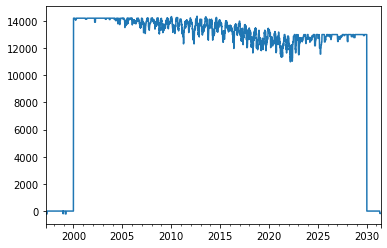

In [24]:
oecd_available.sum(axis=1).plot()

<AxesSubplot:>

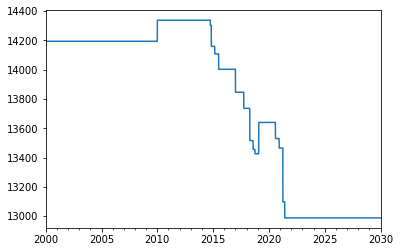

In [25]:
oecd_nameplate.sum(axis=1).plot()

<AxesSubplot:>

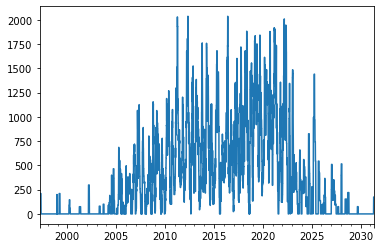

In [26]:
oecd_outages.sum(axis=1).plot()

5 year average unplanned new

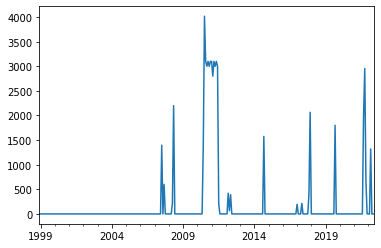

In [55]:
UK = oecd_unplanned.loc[:,'United Kingdom'].resample('MS').sum().plot()

In [47]:
AT.index.daysinmonth

Int64Index([31, 31, 28, 31, 30, 31, 30, 31, 31, 30,
            ...
            30, 31, 30, 31, 31, 28, 31, 30, 31, 30],
           dtype='int64', length=283)

In [64]:
UK = pivot_seasonal(convert_monthly(oecd_unplanned.loc['2016':'2021','United Kingdom']))

In [65]:
UK

0                                      
year  2016       2017 2018  2019 2020       2021
month                                           
1      0.0   6.290323  0.0   0.0  0.0   0.000000
2      0.0   0.000000  0.0   0.0  0.0   0.000000
3      0.0   0.000000  0.0   0.0  0.0   0.000000
4      0.0   0.000000  0.0   0.0  0.0   0.000000
5      0.0   6.935484  0.0   0.0  0.0   0.000000
6      0.0   0.000000  0.0   0.0  0.0   0.000000
7      0.0   0.000000  0.0   0.0  0.0   0.000000
8      0.0   0.000000  0.0   0.0  0.0   0.000000
9      0.0   0.000000  0.0  60.0  0.0  66.500000
10     0.0   0.000000  0.0   0.0  0.0  95.322581
11     0.0  13.333333  0.0   0.0  0.0  22.000000
12     0.0  66.612903  0.0   0.0  0.0   0.000000

In [69]:
def get_5_yr_average_by_country(df):
    empty_list=[]
    for c in df.columns:
        seasonal = pivot_seasonal(convert_monthly(oecd_unplanned.loc['2016':'2021',c]))
        empty_list.append(seasonal.mean(axis=1))
    df_av = pd.concat(empty_list, axis=1)
    df_av.columns = df.columns
    return df_av

In [73]:
unplanned_av = get_5_yr_average_by_country(oecd_unplanned).drop(columns=['year', 'month'])

<AxesSubplot:xlabel='month'>

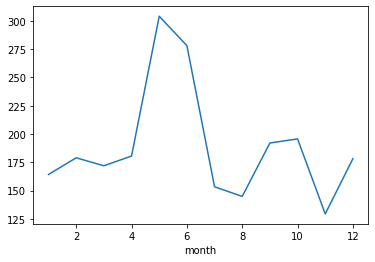

In [76]:
unplanned_av.sum(axis=1).plot()

5 year average unplanned

In [ ]:
def aggregate(df):
    ts = pd.DataFrame(df.sum(axis=1))
    return ts

In [42]:
def convert_monthly(df):
    df_monthly = df.resample('MS').sum()
    df_monthly = df_monthly/df_monthly.index.daysinmonth
    return df_monthly

In [61]:
def pivot_seasonal(data):
    df = pd.DataFrame(data)
    df['year'] = df.index.year
    df['month'] = df.index.month
    df_seasonal = df.pivot(columns='year', index='month')
    return df_seasonal

In [ ]:
def get_5_yr_average_unplanned(country):
    df = RefineryData().get_outage('COUNTRY', country, 'CDU', 'Unplanned', ['Economic'])
    ts = aggregate(df)
    month_ts = convert_monthly(ts)
    return month_ts

In [ ]:
france = get_5_yr_average_unplanned(['France'])

In [ ]:
france

# data exploration

In [ ]:
# total_outage = RefineryData().get_outage('COUNTRY', oecd_eu_countries, 'CDU', 'Total', ['Economic'], pdate=dt(2020,1,1))
planned_outage = RefineryData().get_outage('COUNTRY', oecd_eu_countries, 'CDU', 'Planned', ['Economic'])
unplanned_outage = RefineryData().get_outage('COUNTRY', oecd_eu_countries, 'CDU', 'Unplanned', ['Economic'])

In [ ]:
# oecd_total_outage_ts = total_outage.sum(axis=1)
planned_ts = planned_outage.sum(axis=1)
unplanned_ts = unplanned_outage.sum(axis=1)

In [ ]:
df = pd.concat([planned_ts, unplanned_ts], axis=1)
df.columns = ['planned', 'unplanned']

In [ ]:
df.plot(figsize=(20,10))

In [ ]:
def convert_monthly(df):
    df_monthly = df.resample('MS').sum()
    df_monthly['unplanned'] = df_monthly['unplanned']/df_monthly.index.daysinmonth
    df_monthly['planned'] = df_monthly['planned']/df_monthly.index.daysinmonth
    return df_monthly

In [ ]:
def pivot_seasonal(df, col):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df_seasonal = df.pivot(columns='year', index='month', values=col)
    return df_seasonal

In [ ]:
df_monthly = convert_monthly(df)

In [ ]:
df_monthly

In [ ]:
df_monthly.plot(kind='area',figsize=(20,10))

## unplanned data exploration

In [ ]:
df_monthly.loc['2009':'2022','unplanned'].plot()

In [ ]:
x = pivot_seasonal(df_monthly['2009':'2021'], 'unplanned')

In [ ]:
x.plot(kind='line', figsize=(20,10))

In [ ]:
x['average'] = x.mean(axis=1)

In [ ]:
x

In [ ]:
x['average'].plot(kind='line', figsize=(20,10))

In [ ]:
## without 2020
y = pivot_seasonal(df_monthly['2016':'2021'], 'unplanned')
y.drop(columns=2020, inplace=True)
y['average'] = y.mean(axis=1)
y['average'].plot(kind='line', figsize=(20,10), title='without 2020')

In [ ]:
y

## planned data exploration

In [ ]:
df_monthly.loc['2009':'2022','planned'].plot()

In [ ]:
planned = pivot_seasonal(df_monthly['2009':'2027'], 'planned')
future_planned = planned.loc[:,2022:].copy()
past_planned = planned.loc[:,2016:2021].copy()

In [ ]:
planned.plot(kind='line', figsize=(20,10))

In [ ]:
future_planned.plot(kind='line', figsize=(20,10))

In [ ]:
past_planned.plot(kind='line', figsize=(20,10))

In [ ]:
past_planned['average_past'] = past_planned.mean(axis=1)
future_planned['average'] = future_planned.mean(axis=1)

In [ ]:
comparison = pd.concat([past_planned['average_past'],future_planned['average']], axis=1)

In [ ]:
comparison.plot(kind='line', figsize=(20,10))

In [ ]:
## without 2020
y = pivot_seasonal(df_monthly['2016':'2021'], 'unplanned')
y.drop(columns=2020, inplace=True)
y['average'] = y.mean(axis=1)
y['average'].plot(kind='line', figsize=(20,10), title='without 2020')

In [ ]:
y